In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [3]:
df = pd.read_csv('/content/student_lifestyle_dataset..csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,Moderate,Male,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,Moderate,Female,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,Moderate,Male,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,High,Male,7.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


# EDA

In [5]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

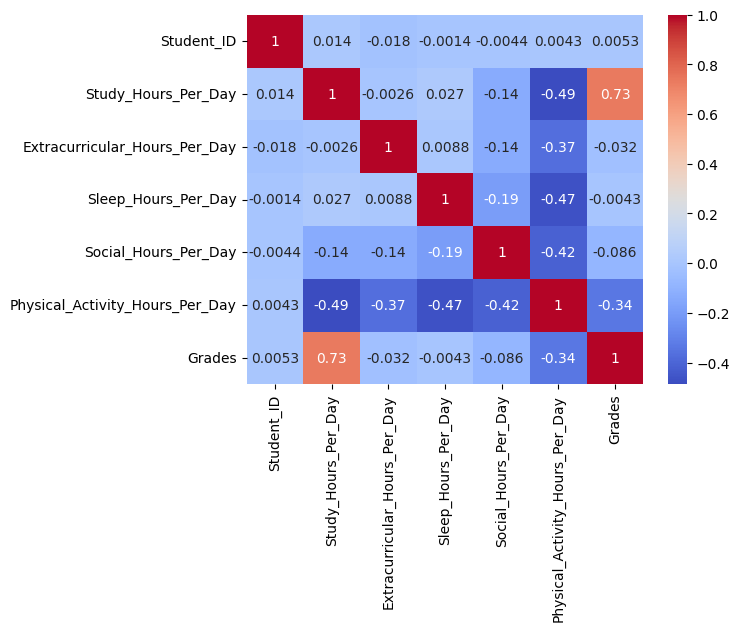

In [6]:
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap= 'coolwarm')

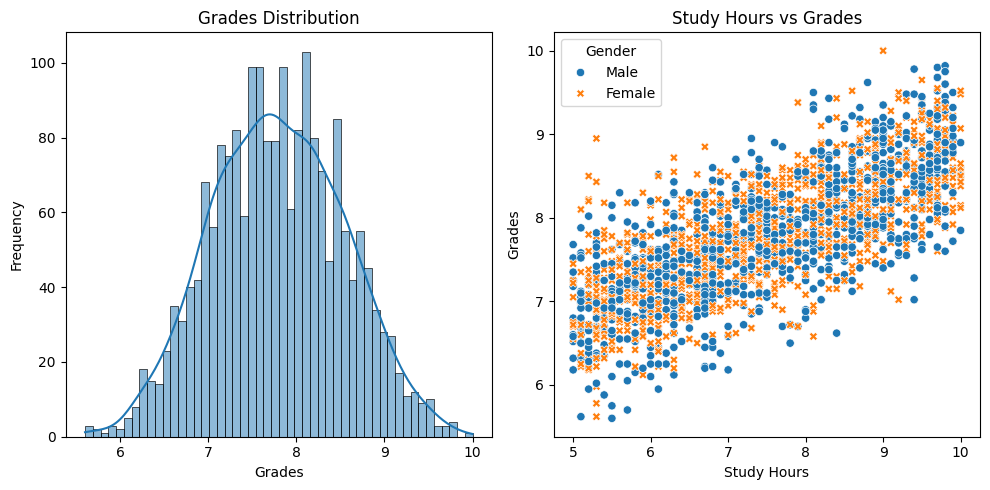

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot 1
sns.histplot(df['Grades'], kde=True, ax=axes[0], bins = 50)
axes[0].set_title('Grades Distribution')
axes[0].set_xlabel('Grades')
axes[0].set_ylabel('Frequency')

# plot 2
sns.scatterplot(df, x='Study_Hours_Per_Day', y='Grades', style='Gender', hue='Gender', ax=axes[1])
axes[1].set_title('Study Hours vs Grades')
axes[1].set_xlabel('Study Hours')
axes[1].set_ylabel('Grades')

# Show plot
plt.tight_layout()
plt.show()

<ipython-input-8-8bda9d0b551c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], ax=axes[1],palette='Set2')


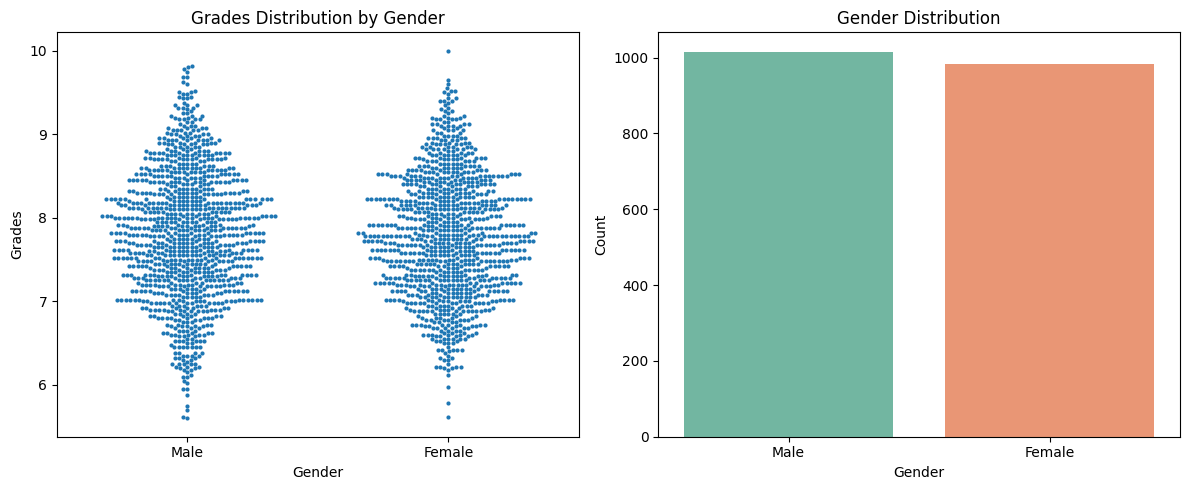

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#plot 1
sns.swarmplot(x=df['Gender'], y=df['Grades'],size= 3, ax=axes[0])
axes[0].set_title('Grades Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Grades')

#plot 2
sns.countplot(x=df['Gender'], ax=axes[1],palette='Set2')
axes[1].set_title('Gender Distribution')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
# Show plot
plt.tight_layout()
plt.show()

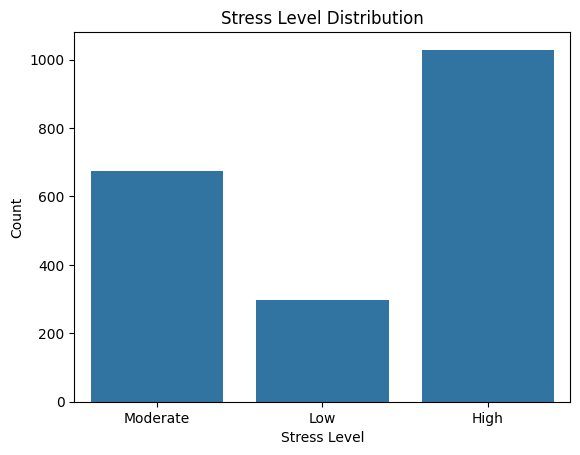

In [9]:
sns.countplot(df, x = 'Stress_Level')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

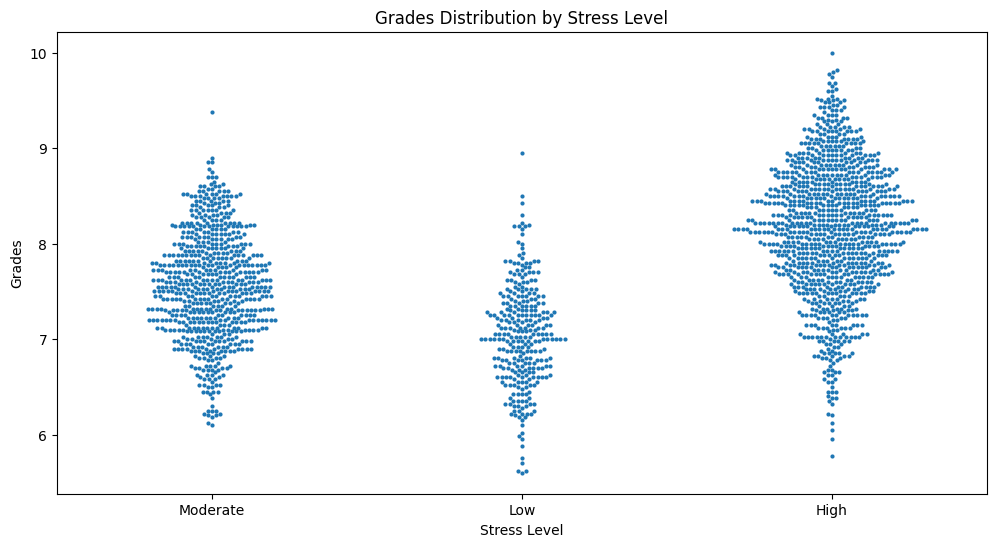

In [10]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x=df['Stress_Level'], y=df['Grades'], size = 3)
plt.title('Grades Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Grades')
plt.show()

# Encoding Categorical Column

In [11]:
from sklearn.preprocessing import LabelEncoder
new_df = df.copy()

for col in ['Gender', 'Stress_Level']:
  le = LabelEncoder()
  new_df[col] = le.fit_transform(new_df[col])
new_df


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,2,1,7.48
1,2,5.3,3.5,8.0,4.2,3.0,1,0,6.88
2,3,5.1,3.9,9.2,1.2,4.6,1,1,6.68
3,4,6.5,2.1,7.2,1.7,6.5,2,1,7.20
4,5,8.1,0.6,6.5,2.2,6.6,0,1,8.78
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,2,1,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,2,0,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,2,1,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,0,1,7.60


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   int64  
 7   Gender                           2000 non-null   int64  
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


# Build Model

In [13]:
X = new_df.drop(['Grades', 'Student_ID'], axis = 1).values
y = new_df['Grades'].values


In [14]:
X

array([[ 6.9,  3.8,  8.7, ...,  1.8,  2. ,  1. ],
       [ 5.3,  3.5,  8. , ...,  3. ,  1. ,  0. ],
       [ 5.1,  3.9,  9.2, ...,  4.6,  1. ,  1. ],
       ...,
       [ 6.2,  0. ,  6.2, ..., 10.8,  2. ,  1. ],
       [ 8.1,  0.7,  7.6, ...,  4.1,  0. ,  1. ],
       [ 9. ,  1.7,  7.3, ...,  2.9,  0. ,  1. ]])

In [15]:
X.shape

(2000, 7)

In [16]:
y

array([7.48, 6.88, 6.68, ..., 7.85, 7.6 , 8.95])

In [17]:
# Split training and Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Build Linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# predict model
y_pred = model.predict(X_test)

In [19]:
# Model evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.2651100702877396
R-squared: 0.545938772158157


In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Build XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 100, learning_rate = 0.5)
model.fit(X_train, y_train)

# predict model
y_pred = model.predict(X_test)

In [23]:
# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.3898524222001767
R-squared: 0.33228915329696096


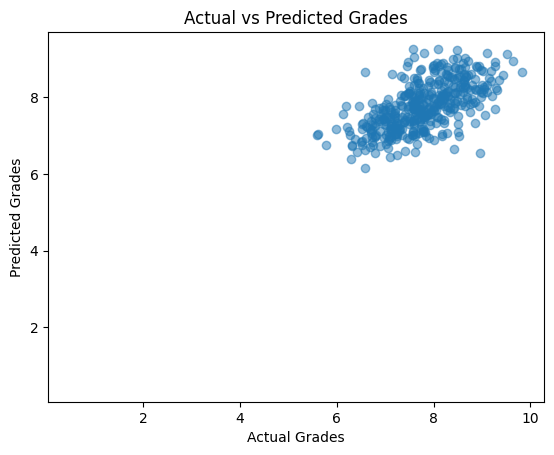

In [25]:
# actual predict vs plot
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.plot([0.5], [0.5], '--', color = 'red')
plt.show()

## Feature importance analysis

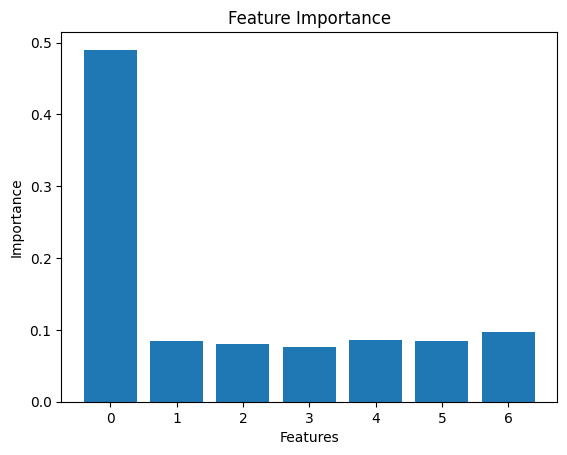

In [27]:
# Feature importance analysis
importances = model.feature_importances_
# plot importance feature
plt.bar(range(len(importances)), importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

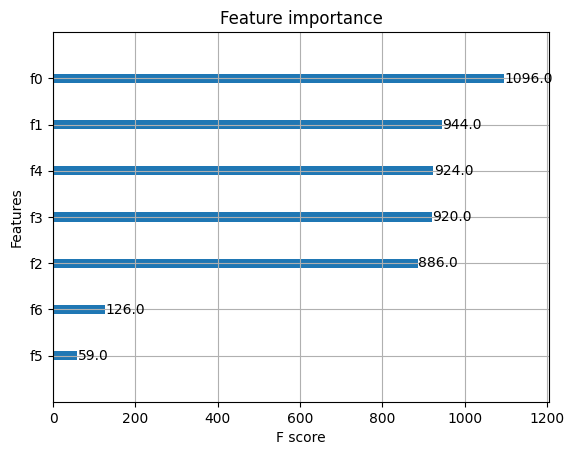

In [28]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   int64  
 7   Gender                           2000 non-null   int64  
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 140.8 KB


In [49]:
# drop unimportance feature
X = new_df.drop(['Student_ID', 'Stress_Level', 'Gender', 'Sleep_Hours_Per_Day'], axis= 1).values
y = new_df['Grades'].values
#

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [56]:
# Build Xgboost model again
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 100, learning_rate = 0.5)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 4.489786634151276e-05
R-squared: 0.9999231022031854


In [57]:
# build linear regression model again
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# predict model
y_pred = model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.4667088860582123e-28
R-squared: 1.0


In [58]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean score: 1.0


# Overfitting test

In [60]:
# overfitting test
# train evaluation
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
# test evaluation
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train MSE:', mse_train)
print('Train R2:', r2_train)
print('Test MSE:', mse_test)
print('Test R2:', r2_test)

Train MSE: 2.4616404547421674e-28
Train R2: 1.0
Test MSE: 2.4667088860582123e-28
Test R2: 1.0
